In [2]:
# Install FEniCS
try:
    from fenics import *
except ImportError:
    !wget "https://fem-on-colab.github.io/releases/fenics-install-release-real.sh" -O "/tmp/fenics-install.sh" && bash "/tmp/fenics-install.sh"
    from fenics import *

--2025-04-11 13:41:11--  https://fem-on-colab.github.io/releases/fenics-install-release-real.sh
Resolving fem-on-colab.github.io (fem-on-colab.github.io)... 185.199.108.153, 185.199.109.153, 185.199.110.153, ...
Connecting to fem-on-colab.github.io (fem-on-colab.github.io)|185.199.108.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4180 (4.1K) [application/x-sh]
Saving to: ‘/tmp/fenics-install.sh’

/tmp/fenics-install 100%[===================>]   4.08K  --.-KB/s    in 0s      

2025-04-11 13:41:11 (42.6 MB/s) - ‘/tmp/fenics-install.sh’ saved [4180/4180]

+ INSTALL_PREFIX=/usr/local
++ echo /usr/local
++ awk -F/ '{print NF-1}'
+ INSTALL_PREFIX_DEPTH=2
+ PROJECT_NAME=fem-on-colab
+ SHARE_PREFIX=/usr/local/share/fem-on-colab
+ FENICS_INSTALLED=/usr/local/share/fem-on-colab/fenics.installed
+ [[ ! -f /usr/local/share/fem-on-colab/fenics.installed ]]
+ PYBIND11_INSTALL_SCRIPT_PATH=https://github.com/fem-on-colab/fem-on-colab.github.io/raw/1f33a7ab/releases/pybi

In [ ]:
from dolfin import *
import matplotlib.pyplot as plt
import numpy as np

# Sin especificar u"=0 en bordes

Vemos que el código sin especificar derivada segunda nula en los bordes anda mal

[ 0.00000000e+00  2.84300207e+06  2.13225155e+06  1.42150103e+06
  7.10750517e+05  1.31180475e+06  1.69460408e+06  2.07740341e+06
  2.46020274e+06 -1.03741856e+06 -4.50112732e+05  1.37193096e+05
  7.24498924e+05 -2.23713827e+04 -2.76133177e+05 -5.29894971e+05
 -7.83656765e+05  2.34983766e+05  1.70644979e+05  1.06306192e+05
  4.19674044e+04  9.41687505e+04  1.29372504e+05  1.64576258e+05
  1.99780012e+05 -1.76804289e+05 -1.09061029e+05 -4.13177692e+04
  2.64254907e+04 -6.32370478e+05 -5.18478931e+05 -4.04587383e+05
 -2.90695836e+05 -1.09304461e+05 -2.40070965e+05 -3.70837470e+05
 -5.01603974e+05  4.42364888e+04  5.85125128e+03 -3.25339862e+04
 -7.09192237e+04 -6.54210446e+04 -3.80066613e+04 -1.05922779e+04
  1.68221054e+04  3.21648594e+03 -1.39428967e+04 -3.11022793e+04
 -4.82616620e+04  2.12585077e+05  1.60242930e+05  1.07900782e+05
  5.55586338e+04 -6.87360955e+04  1.59419770e+03  7.19244909e+04
  1.42254784e+05 -1.28749814e+05 -1.13746384e+05 -9.87429548e+04
 -8.37395252e+04  1.89695

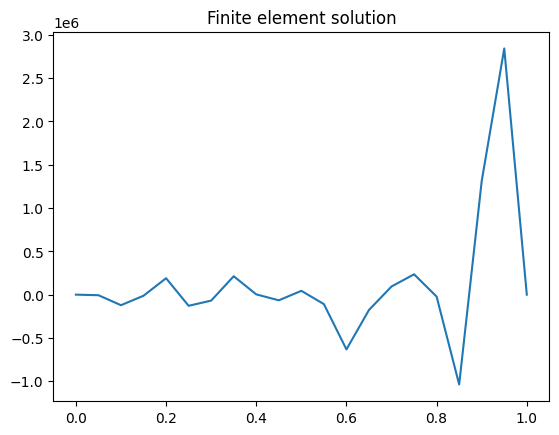

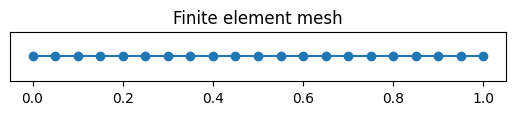

In [ ]:

mesh=UnitIntervalMesh(20)
V = FunctionSpace(mesh, "P", 4) #Crea el espacio finito de funciones, la P hace referencia a la familia de elementos, en este caso la de Lagrange. El 1 define el grado de elementos finitos, 1 quiere decir nodos en cada vértice

def boundary(x, on_boundary):
  return on_boundary #Indica si un punto esta en el borde

bc = DirichletBC(V, Constant(0), boundary)

# Define variational problem
u = TrialFunction(V)
v = TestFunction(V)
EI = Constant(1.35e7)
q = Constant(5.0e4)
a = inner(grad(grad(u)), grad(grad(v))) * dx

L = (q/EI)*v*dx
# Compute solution
u = Function(V)
solve(a == L, u, bc);
print(np.array(u.vector()))
# Plot solution and mesh
plot(u, title="Finite element solution")
plt.show()
plot(mesh, title="Finite element mesh")




[ 0.00000000e+00  1.74047522e+02  1.30535641e+02  8.70237609e+01
  4.35118805e+01 -8.57898550e+01 -2.08305108e+01  4.41288334e+01
  1.09088178e+02 -2.54762196e+02 -2.12519110e+02 -1.70276025e+02
 -1.28032940e+02  1.28764574e+02  3.28828815e+01 -6.29988108e+01
 -1.58880503e+02  1.24261466e+01  4.15107534e+01  7.05953603e+01
  9.96799671e+01 -3.21623988e+02 -2.38111455e+02 -1.54598921e+02
 -7.10863871e+01 -3.13862543e+02 -3.15802904e+02 -3.17743266e+02
 -3.19683627e+02  3.85063264e+01 -4.95858910e+01 -1.37678108e+02
 -2.25770326e+02  5.68469498e+01  5.22617940e+01  4.76766381e+01
  4.30914822e+01 -2.75158942e+02 -1.92157469e+02 -1.09155996e+02
 -2.61545231e+01 -2.49500145e+01 -8.75022464e+01 -1.50054478e+02
 -2.12606710e+02  1.57700788e+02  1.12038087e+02  6.63753865e+01
  2.07126860e+01 -2.79389753e+02 -1.70117118e+02 -6.08444825e+01
  4.84281525e+01 -1.57134909e+02 -1.87698620e+02 -2.18262331e+02
 -2.48826042e+02  2.61486416e+02  1.56831085e+02  5.21757533e+01
 -5.24795781e+01 -2.20267

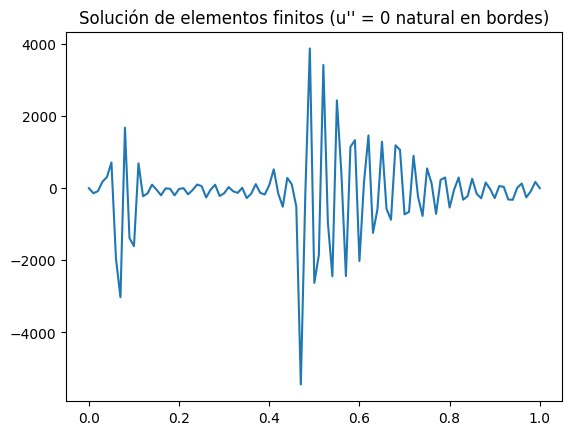

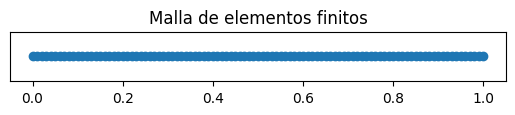

u'' en x=0: -11906.662481188108 u'' en x=1: -13165.91716759822


In [ ]:
from dolfin import *
import numpy as np
import matplotlib.pyplot as plt

# Crear malla y espacio de funciones
mesh = UnitIntervalMesh(100)
V = FunctionSpace(mesh, "P", 4)  # Grado 4 para derivadas hasta orden 3 continuas

# Definir condición de borde (solo u = 0 en los extremos)
def boundary(x, on_boundary):
    return on_boundary

bc = DirichletBC(V, Constant(0), boundary)

# Definir problema variacional
u = TrialFunction(V)
v = TestFunction(V)
EI = Constant(1.35e7)
q = Constant(5.0e4)
a = inner(grad(grad(u)), grad(grad(v))) * dx  # u'' v''
L = (q/EI) * v * dx  # Carga distribuida

# Resolver
u = Function(V)
solve(a == L, u, bc);

# Imprimir y graficar solución
print(np.array(u.vector()))
plot(u, title="Solución de elementos finitos (u'' = 0 natural en bordes)")
plt.show()
plot(mesh, title="Malla de elementos finitos")
plt.show()

# Opcional: Verificar u'' en los bordes
u_xx = project(u.dx(0), V)  # Proyectar la segunda derivada en V
print("u'' en x=0:", u_xx(0.0), "u'' en x=1:", u_xx(1.0))

# Alternativa para derivada segunda nula

Tomo $w=u"$ luego si especifico las condiciones de borde de Dirichlet esto debería funcionar:

$u(0)=u(1)=0$

$w(0)=w(1)=0$ que vendría a ser $u"(0)=u"(1)=0$

[ 0.00000000e+00 -8.79629630e-05 -6.68402778e-05 -4.51388889e-05
 -2.28587963e-05 -1.66666667e-04 -1.47858796e-04 -1.28472222e-04
 -1.08506944e-04 -2.36111111e-04 -2.19618056e-04 -2.02546296e-04
 -1.84895833e-04 -2.96296296e-04 -2.82118056e-04 -2.67361111e-04
 -2.52025463e-04 -3.47222222e-04 -3.35358796e-04 -3.22916667e-04
 -3.09895833e-04 -3.88888889e-04 -3.79340278e-04 -3.69212963e-04
 -3.58506944e-04 -4.21296296e-04 -4.14062500e-04 -4.06250000e-04
 -3.97858796e-04 -4.44444444e-04 -4.39525463e-04 -4.34027778e-04
 -4.27951389e-04 -4.58333333e-04 -4.55729167e-04 -4.52546296e-04
 -4.48784722e-04 -4.62962963e-04 -4.62673611e-04 -4.61805556e-04
 -4.60358796e-04 -4.58333333e-04 -4.60358796e-04 -4.61805556e-04
 -4.62673611e-04 -4.44444444e-04 -4.48784722e-04 -4.52546296e-04
 -4.55729167e-04 -4.21296296e-04 -4.27951389e-04 -4.34027778e-04
 -4.39525463e-04 -3.88888889e-04 -3.97858796e-04 -4.06250000e-04
 -4.14062500e-04 -3.47222222e-04 -3.58506944e-04 -3.69212963e-04
 -3.79340278e-04 -2.96296

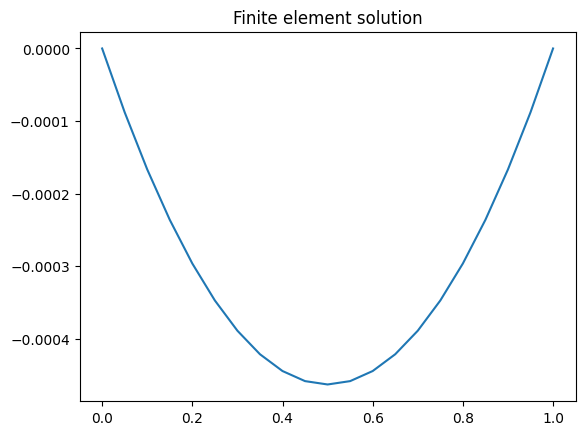

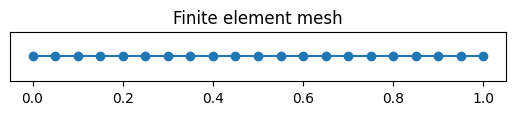

In [ ]:
#Uso u"=u
mesh=UnitIntervalMesh(20)
V = FunctionSpace(mesh, "P", 4) #Crea el espacio finito de funciones, la P hace referencia a la familia de elementos, en este caso la de Lagrange. El 1 define el grado de elementos finitos, 1 quiere decir nodos en cada vértice

def boundary(x, on_boundary):
  return on_boundary #Indica si un punto esta en el borde

bc = DirichletBC(V, Constant(0), boundary)

# Define variational problem
u = TrialFunction(V)
v = TestFunction(V)
EI = Constant(1.35e7)
q = Constant(5.0e4)
a =- inner((grad(u)), (grad(v))) * dx

L = (q/EI)*v*dx
# Compute solution
u = Function(V)
solve(a == L, u, bc);
print(np.array(u.vector()))
# Plot solution and mesh
plot(u, title="Finite element solution")
plt.show()
plot(mesh, title="Finite element mesh")

Calling FFC just-in-time (JIT) compiler, this may take some time.


Level 25:FFC:Calling FFC just-in-time (JIT) compiler, this may take some time.
INFO:FFC:Compiling element ffc_element_406e980b9c40d0c770ee9d26b4b57440d97df7ac

INFO:FFC:Compiler stage 1: Analyzing element(s)
INFO:FFC:--------------------------------------
INFO:FFC:  
INFO:FFC:Compiler stage 1 finished in 0.00777459 seconds.

INFO:FFC:Compiler stage 2: Computing intermediate representation
INFO:FFC:-------------------------------------------------------
INFO:FFC:  Computing representation of 1 elements
DEBUG:FFC:  Reusing element from cache
DEBUG:FFC:  Reusing element from cache
DEBUG:FFC:  Reusing element from cache
DEBUG:FFC:  Reusing element from cache
INFO:FFC:  Computing representation of 1 dofmaps
DEBUG:FFC:  Reusing element from cache
INFO:FFC:  Computing representation of 0 coordinate mappings
INFO:FFC:  Computing representation of integrals
INFO:FFC:  Computing representation of forms
INFO:FFC:  
INFO:FFC:Compiler stage 2 finished in 0.0198245 seconds.

INFO:FFC:Compiler stage 

Calling FFC just-in-time (JIT) compiler, this may take some time.


Level 25:FFC:Calling FFC just-in-time (JIT) compiler, this may take some time.
INFO:FFC:Compiling form ffc_form_2e38ee82e9bbf3d3307f2fc689a259c0f598f68c

INFO:FFC:Compiler stage 1: Analyzing form(s)
INFO:FFC:-----------------------------------
DEBUG:FFC:  Preprocessing form using 'uflacs' representation family.
INFO:UFL_LEGACY:Adjusting missing element cell to interval.
INFO:FFC:  
INFO:FFC:  Geometric dimension:       1
  Number of cell subdomains: 0
  Rank:                      1
  Arguments:                 '(v_0)'
  Number of coefficients:    1
  Coefficients:              '[f_1394]'
  Unique elements:           'Mixed<CG3(?,?), CG3(?,?)>, R0(?,?), Vector<1 x CG1(?,?
                             )>'
  Unique sub elements:       'Mixed<CG3(?,?), CG3(?,?)>, R0(?,?), Vector<1 x CG1(?,?
                             )>, CG3(?,?), CG1(?,?)'
  
INFO:FFC:  representation:    auto --> uflacs
INFO:FFC:  quadrature_rule:   auto --> default
INFO:FFC:  quadrature_degree: auto --> 3
INFO:FFC:  q

Calling FFC just-in-time (JIT) compiler, this may take some time.


Level 25:FFC:Calling FFC just-in-time (JIT) compiler, this may take some time.
INFO:FFC:Compiling form ffc_form_c6f9699378387e3370881a4de8622f9152618db5

INFO:FFC:Compiler stage 1: Analyzing form(s)
INFO:FFC:-----------------------------------
DEBUG:FFC:  Preprocessing form using 'uflacs' representation family.
INFO:UFL_LEGACY:Adjusting missing element cell to interval.
INFO:FFC:  
INFO:FFC:  Geometric dimension:       1
  Number of cell subdomains: 0
  Rank:                      2
  Arguments:                 '(v_0, v_1)'
  Number of coefficients:    1
  Coefficients:              '[f_1393]'
  Unique elements:           'Mixed<CG3(?,?), CG3(?,?)>, R0(?,?), Vector<1 x CG1(?,?
                             )>'
  Unique sub elements:       'Mixed<CG3(?,?), CG3(?,?)>, R0(?,?), Vector<1 x CG1(?,?
                             )>, CG3(?,?), CG1(?,?)'
  
INFO:FFC:  representation:    auto --> uflacs
INFO:FFC:  quadrature_rule:   auto --> default
INFO:FFC:  quadrature_degree: auto --> 6
INFO:FF

Calling FFC just-in-time (JIT) compiler, this may take some time.


Level 25:FFC:Calling FFC just-in-time (JIT) compiler, this may take some time.
INFO:FFC:Compiling form ffc_form_41914fe284e6dba658b071f55bd53921d103bf25

INFO:FFC:Compiler stage 1: Analyzing form(s)
INFO:FFC:-----------------------------------
DEBUG:FFC:  Preprocessing form using 'uflacs' representation family.
INFO:FFC:  
INFO:FFC:  Geometric dimension:       1
  Number of cell subdomains: 0
  Rank:                      2
  Arguments:                 '(v_0, v_1)'
  Number of coefficients:    0
  Coefficients:              '[]'
  Unique elements:           'CG1(?,?), Vector<1 x CG1(?,?)>'
  Unique sub elements:       'CG1(?,?), Vector<1 x CG1(?,?)>'
  
INFO:FFC:  representation:    auto --> uflacs
INFO:FFC:  quadrature_rule:   auto --> default
INFO:FFC:  quadrature_degree: auto --> 2
INFO:FFC:  quadrature_degree: 2
INFO:FFC:  
INFO:FFC:Compiler stage 1 finished in 0.0162287 seconds.

INFO:FFC:Compiler stage 2: Computing intermediate representation
INFO:FFC:-----------------------------

Calling FFC just-in-time (JIT) compiler, this may take some time.


Level 25:FFC:Calling FFC just-in-time (JIT) compiler, this may take some time.
INFO:FFC:Compiling form ffc_form_63675ca5328d79bc17bd4200f1426cfb35eebeac

INFO:FFC:Compiler stage 1: Analyzing form(s)
INFO:FFC:-----------------------------------
DEBUG:FFC:  Preprocessing form using 'uflacs' representation family.
INFO:FFC:  
INFO:FFC:  Geometric dimension:       1
  Number of cell subdomains: 0
  Rank:                      1
  Arguments:                 '(v_0)'
  Number of coefficients:    1
  Coefficients:              '[f_1395-1]'
  Unique elements:           'CG1(?,?), CG3(?,?), Vector<1 x CG1(?,?)>'
  Unique sub elements:       'CG1(?,?), CG3(?,?), Vector<1 x CG1(?,?)>'
  
INFO:FFC:  representation:    auto --> uflacs
INFO:FFC:  quadrature_rule:   auto --> default
INFO:FFC:  quadrature_degree: auto --> 4
INFO:FFC:  quadrature_degree: 4
INFO:FFC:  
INFO:FFC:Compiler stage 1 finished in 0.014008 seconds.

INFO:FFC:Compiler stage 2: Computing intermediate representation
INFO:FFC:-------

Calling FFC just-in-time (JIT) compiler, this may take some time.


Level 25:FFC:Calling FFC just-in-time (JIT) compiler, this may take some time.
INFO:FFC:Compiling element ffc_element_b4e93b9b5ea51133f35fab55699c031eac6b82b8

INFO:FFC:Compiler stage 1: Analyzing element(s)
INFO:FFC:--------------------------------------
INFO:FFC:  
INFO:FFC:Compiler stage 1 finished in 0.00230742 seconds.

INFO:FFC:Compiler stage 2: Computing intermediate representation
INFO:FFC:-------------------------------------------------------
INFO:FFC:  Computing representation of 1 elements
DEBUG:FFC:  Reusing element from cache
DEBUG:FFC:  Reusing element from cache
DEBUG:FFC:  Reusing element from cache
INFO:FFC:  Computing representation of 1 dofmaps
DEBUG:FFC:  Reusing element from cache
INFO:FFC:  Computing representation of 0 coordinate mappings
INFO:FFC:  Computing representation of integrals
INFO:FFC:  Computing representation of forms
INFO:FFC:  
INFO:FFC:Compiler stage 2 finished in 0.00793266 seconds.

INFO:FFC:Compiler stage 3: Optimizing intermediate representat

u'' en x=0 (w): 0.0
u'' en x=1 (w): 1.7007428844267416e-21
u'' proyectado en x=0: -3.0864197530855735e-08
u'' proyectado en x=1: -3.0864197530863657e-08


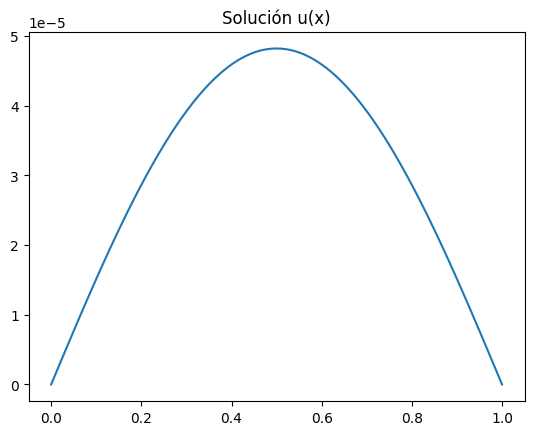

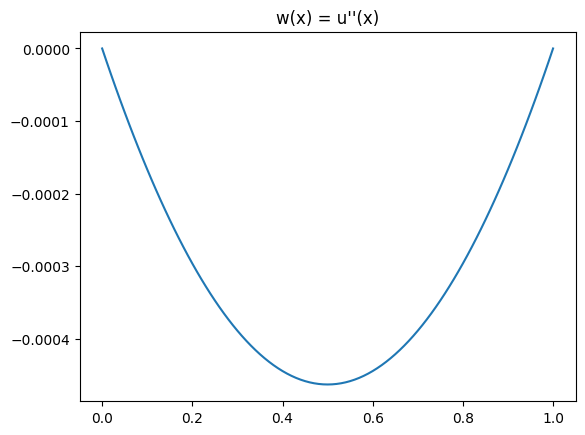

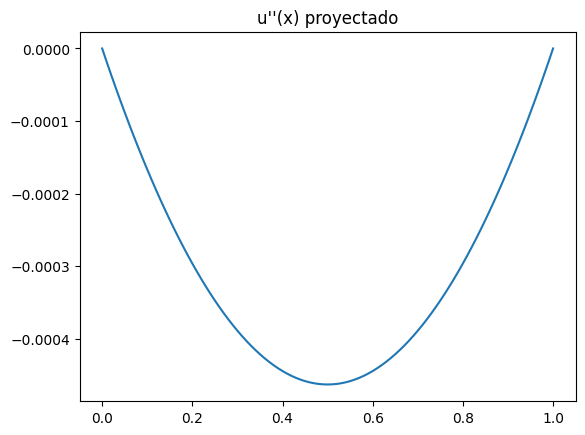

In [34]:
from dolfin import *
import numpy as np
import matplotlib.pyplot as plt

# Malla
mesh = UnitIntervalMesh(100)

# Definir elementos finitos y espacio mixto
V = FiniteElement("P", mesh.ufl_cell(), 3)  # Subimos a grado 3 para mayor estabilidad
W = FiniteElement("P", mesh.ufl_cell(), 3)  # Igual para w
M = FunctionSpace(mesh, MixedElement([V, W]))  # Espacio mixto

# Condiciones de borde
def boundary(x, on_boundary):
    return on_boundary

bc_u = DirichletBC(M.sub(0), Constant(0), boundary)  # u = 0
bc_w = DirichletBC(M.sub(1), Constant(0), boundary)  # w = 0
bcs = [bc_u, bc_w]

# Problema variacional mixto
(u, w) = TrialFunctions(M)
(v1, v2) = TestFunctions(M)
EI = Constant(1.35e7)
q = Constant(5.0e4)
a = w * v1 * dx + inner(grad(u), grad(v1)) * dx - EI * inner(grad(w), grad(v2)) * dx
L = q * v2 * dx

# Resolver
sol = Function(M)
solve(a == L, sol, bcs);

# Extraer u y w
u, w = sol.split(deepcopy=True)

# Verificar u'' proyectando en un espacio compatible
V_scalar = FunctionSpace(mesh, "P", 1)  # Espacio de proyección de grado 1 para u''
u_xx = project(w, V_scalar)  # Proyectamos w directamente, ya que w = u''

# Imprimir valores
print("u'' en x=0 (w):", w(0.0))
print("u'' en x=1 (w):", w(1.0))
print("u'' proyectado en x=0:", u_xx(0.0))
print("u'' proyectado en x=1:", u_xx(1.0))

# Graficar
plt.figure()
plot(u, title="Solución u(x)")
plt.figure()
plot(w, title="w(x) = u''(x)")
plt.figure()
plot(u_xx, title="u''(x) proyectado")
plt.show()

4.8225308641975306e-05


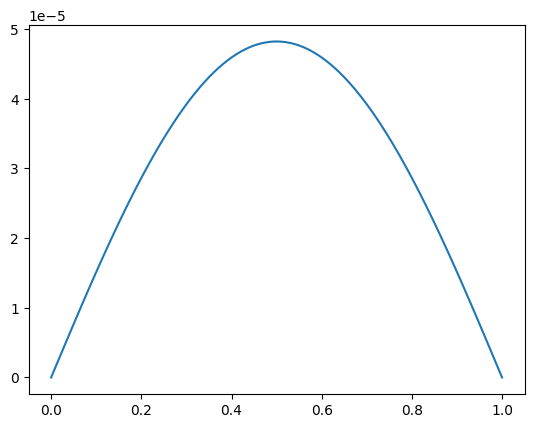

Error L2 entre u y u_exact: 6.5150544771832696e-15


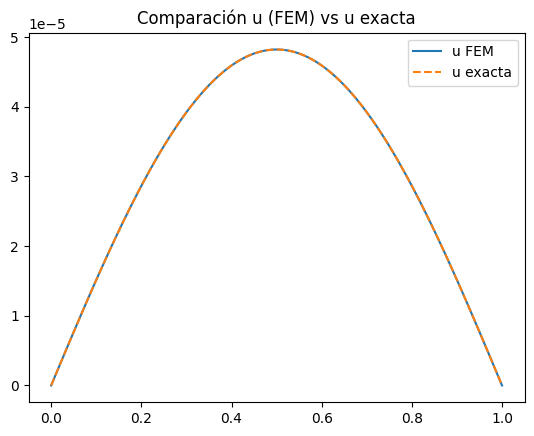

In [43]:
# Solución exacta

C = 5.0e4 / (24 * 1.35e7)  # Ajustado para q/(24EI)
u_exact_expr = Expression("C * x[0] * (x[0] * x[0] * x[0] - 2 * x[0] * x[0] + 1)", C=C, degree=4)
print(u_exact_expr(0.5))
u_exact = interpolate(u_exact_expr, u.function_space())
plot(u_exact)
plt.show()
# Comparar con solución numérica
error_L2 = errornorm(u_exact, u, 'L2')
print("Error L2 entre u y u_exact:", error_L2)

# Graficar ambas soluciones
plt.figure()
plot(u, label="u FEM")
plot(u_exact, label="u exacta", linestyle='--')
plt.legend()
plt.title("Comparación u (FEM) vs u exacta")
plt.show()


## Intento con penalización

Calling FFC just-in-time (JIT) compiler, this may take some time.


Level 25:FFC:Calling FFC just-in-time (JIT) compiler, this may take some time.
INFO:FFC:Compiling form ffc_form_f861683474b97ffe992e7cb4140b3147047bf9ea

INFO:FFC:Compiler stage 1: Analyzing form(s)
INFO:FFC:-----------------------------------
DEBUG:FFC:  Preprocessing form using 'uflacs' representation family.
INFO:UFL_LEGACY:Adjusting missing element cell to interval.
INFO:UFL_LEGACY:Adjusting missing element cell to interval.
INFO:UFL_LEGACY:Adjusting missing element cell to interval.
INFO:FFC:  
INFO:FFC:  Geometric dimension:                 1
  Number of cell subdomains:           0
  Number of exterior_facet subdomains: 3
  Rank:                                2
  Arguments:                           '(v_0, v_1)'
  Number of coefficients:              3
  Coefficients:                        '[f_1598, f_1600, f_1601]'
  Unique elements:                     'CG4(?,?), R0(?,?), Vector<1 x CG1(?,?)>'
  Unique sub elements:                 'CG4(?,?), R0(?,?), Vector<1 x CG1(?,?)>, C

Tamaño del vector u2: 401
Valor de u2 en x=0: -2.5754146806914456e-08
Valor de u2 en x=1: 3.1113722439506163e-07


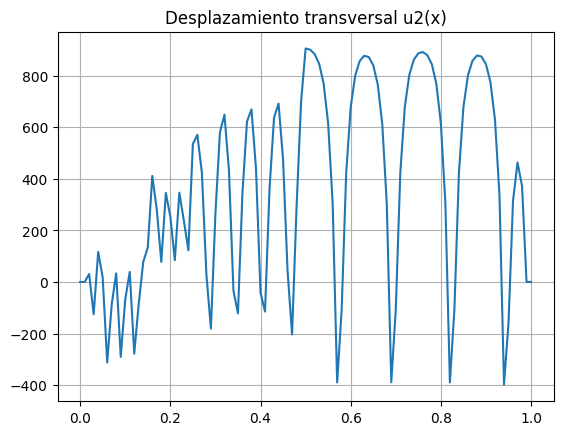

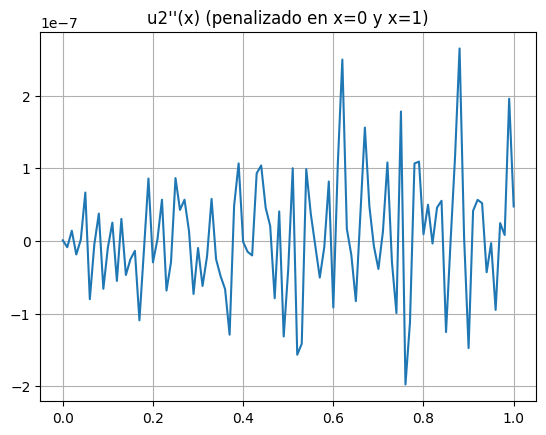

Valor de u2'' en x=0: 8.662952171586157e-10
Valor de u2'' en x=1: 4.750049796582003e-08


In [39]:


from dolfin import *
import matplotlib.pyplot as plt

# Malla
mesh = UnitIntervalMesh(100)  # Intervalo [0,1] con 100 elementos

# Espacio de funciones
V2 = FunctionSpace(mesh, "P", 4)  # u2 (desplazamiento transversal, grado 4 para u2'')

# Definir bordes
boundaries = MeshFunction("size_t", mesh, mesh.topology().dim() - 1)
boundaries.set_all(0)
left = AutoSubDomain(lambda x, on_boundary: on_boundary and near(x[0], 0))
right = AutoSubDomain(lambda x, on_boundary: on_boundary and near(x[0], 1))
left.mark(boundaries, 1)   # Borde izquierdo: x = 0
right.mark(boundaries, 2)  # Borde derecho: x = 1
ds = Measure("ds", domain=mesh, subdomain_data=boundaries)

# Constantes
EI = Constant(1.35e7)     # Rigidez a flexión
q2 = Constant(5.0e4)      # Carga transversal
gamma1 = Constant(1.0e10) # Penalización para u2
gamma2 = Constant(1.0e10) # Penalización para u2''

# Formulación variacional
u2 = TrialFunction(V2)
v2 = TestFunction(V2)
a = (EI * u2.dx(0).dx(0) * v2.dx(0).dx(0) * dx +
     gamma1 * u2 * v2 * ds(1) + gamma1 * u2 * v2 * ds(2) +
     gamma2 * u2.dx(0).dx(0) * v2.dx(0).dx(0) * ds(1) +
     gamma2 * u2.dx(0).dx(0) * v2.dx(0).dx(0) * ds(2))
L = q2 * v2 * dx

# Resolver
u2_sol = Function(V2)
solve(a == L, u2_sol)

# Imprimir información
print(f"Tamaño del vector u2: {len(u2_sol.vector())}")
print(f"Valor de u2 en x=0: {u2_sol(0.0)}")
print(f"Valor de u2 en x=1: {u2_sol(1.0)}")

# Graficar u2
plt.figure()
plot(u2_sol, title="Desplazamiento transversal u2(x)")
plt.grid(True)
plt.show()

# Verificar u2''
V_low = FunctionSpace(mesh, "P", 3)
u2_xx = project(u2_sol.dx(0).dx(0), V_low)
plt.figure()
plot(u2_xx, title="u2''(x) (penalizado en x=0 y x=1)")
plt.grid(True)
plt.show()

# Evaluar u2'' en los bordes
print(f"Valor de u2'' en x=0: {u2_xx(0.0)}")
print(f"Valor de u2'' en x=1: {u2_xx(1.0)}")

# Prueba agregando componente longitudinal

401
1.666666666666702e-05


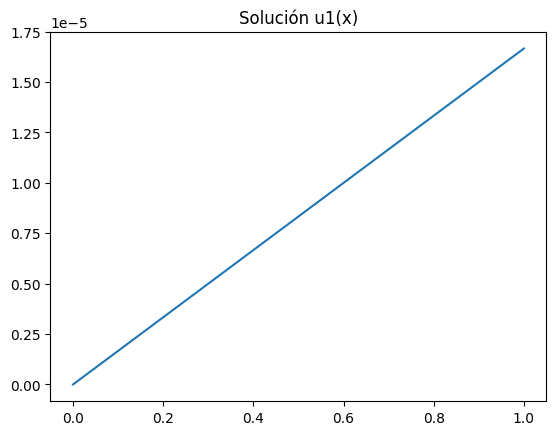

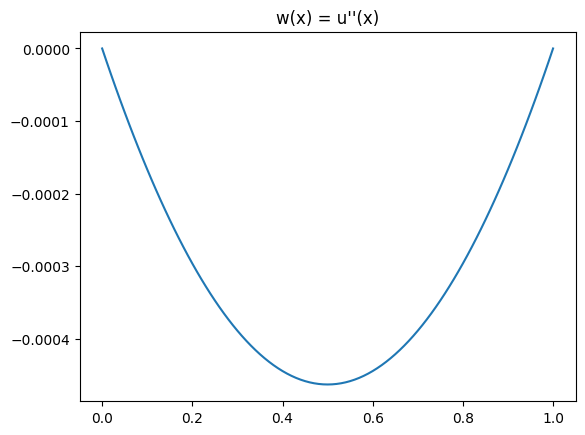

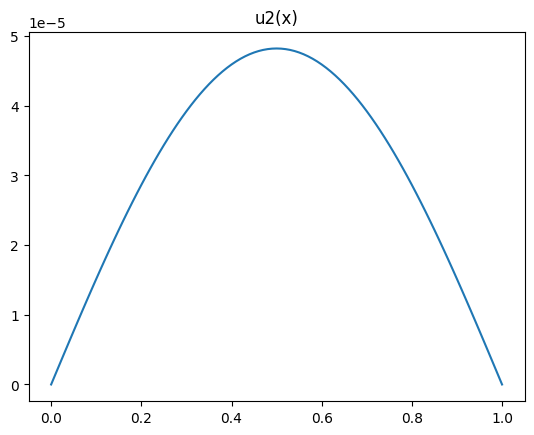

In [ ]:
from dolfin import *
import numpy as np
import matplotlib.pyplot as plt

# Malla
mesh = UnitIntervalMesh(100)

# Definir elementos finitos y espacio mixto
V1 = FiniteElement("P", mesh.ufl_cell(), 4)  
V2 = FiniteElement("P", mesh.ufl_cell(), 4) 
W = FiniteElement("P", mesh.ufl_cell(), 3)  
M = FunctionSpace(mesh, MixedElement([V1,V2, W]))  # Espacio mixto

# Condiciones de borde
def boundary(x, on_boundary):
    return on_boundary

def left_boundary(x, on_boundary):
    return on_boundary and near(x[0], 0)


bc_u1 = DirichletBC(M.sub(0), Constant(0), left_boundary )  # u1(0) = 0
bc_u2 = DirichletBC(M.sub(1), Constant(0), boundary)  # u2 = 0
bc_w = DirichletBC(M.sub(2), Constant(0), boundary)  # w = 0
bcs = [bc_u1, bc_u2, bc_w]

# Problema variacional mixto
(u1, u2, w) = TrialFunctions(M)
(v1, v2, v3) = TestFunctions(M)
EI = Constant(1.35e7)
EA = Constant(0.06*3.0e10)

q1= Constant(3.0e4)
q2 = Constant(5.0e4)

#Primer ecuación (transversal)
a1 = w * v2 * dx + inner(grad(u2), grad(v2)) * dx - EI * inner(grad(w), grad(v3)) * dx
L1 = q2 * v3 * dx

#Segunda ecuación (longitudinal)
a2 = EA * u1.dx(0) *v1 * dx
L2= q1 * v1 * dx

#Combinación
a = a1 + a2
L = L1 + L2

# Resolver
sol = Function(M)
solve(a == L, sol, bcs);

# Extraer u y w
u1, u2, w = sol.split(deepcopy=True)

print(len(u1.vector()))
print(u1.vector()[0])

# Graficar
plt.figure()
plot(u1, title="Solución u1(x)")
plt.show()
plt.figure()
plot(w, title="w(x) = u''(x)")
plt.figure()
plot(u2, title="u2(x)")
plt.show()

## Solo la longitudinal

[ 1.11111111e-05  1.10000000e-05  1.10277778e-05  1.10555556e-05
  1.10833333e-05  1.08888889e-05  1.09166667e-05  1.09444444e-05
  1.09722222e-05  1.07777778e-05  1.08055556e-05  1.08333333e-05
  1.08611111e-05  1.06666667e-05  1.06944444e-05  1.07222222e-05
  1.07500000e-05  1.05555556e-05  1.05833333e-05  1.06111111e-05
  1.06388889e-05  1.04444444e-05  1.04722222e-05  1.05000000e-05
  1.05277778e-05  1.03333333e-05  1.03611111e-05  1.03888889e-05
  1.04166667e-05  1.02222222e-05  1.02500000e-05  1.02777778e-05
  1.03055556e-05  1.01111111e-05  1.01388889e-05  1.01666667e-05
  1.01944444e-05  1.00000000e-05  1.00277778e-05  1.00555556e-05
  1.00833333e-05  9.88888889e-06  9.91666667e-06  9.94444444e-06
  9.97222222e-06  9.77777778e-06  9.80555556e-06  9.83333333e-06
  9.86111111e-06  9.66666667e-06  9.69444444e-06  9.72222222e-06
  9.75000000e-06  9.55555556e-06  9.58333333e-06  9.61111111e-06
  9.63888889e-06  9.44444444e-06  9.47222222e-06  9.50000000e-06
  9.52777778e-06  9.33333

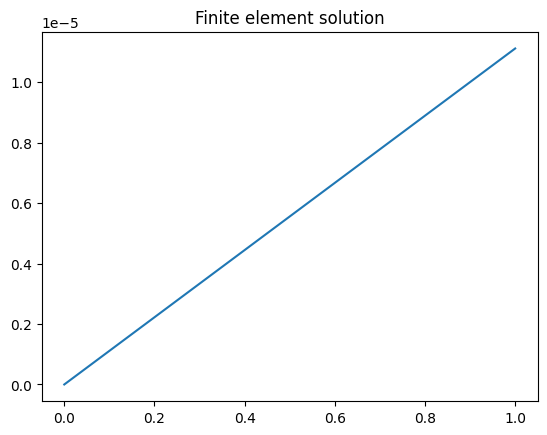

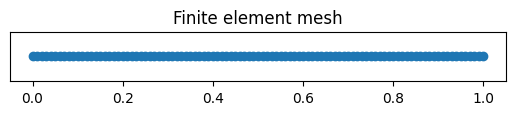

In [ ]:

mesh=UnitIntervalMesh(100)
V = FunctionSpace(mesh, "P", 4) 

def left_boundary(x, on_boundary):
    return on_boundary and near(x[0], 0)

bc = DirichletBC(V, Constant(0), left_boundary)

# Define variational problem
u = TrialFunction(V)
v = TestFunction(V)
EA = Constant(0.06 * 3.0e10)
q = Constant(2.0e4)
a = EA * u.dx(0)* v * dx

L = q*v*dx
# Compute solution
u = Function(V)
solve(a == L, u, bc);
print(np.array(u.vector()))
# Plot solution and mesh
plot(u, title="Finite element solution")
plt.show()
plot(mesh, title="Finite element mesh")